In [61]:
import numpy as np
import pandas as pd
import sys
import re
import matplotlib.pyplot as plt

# List of all possible letters representing amino acids.
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Amino acid physicochemical properties
# Polarity (Grantham, 1974)
polarity = {'A': 8.1, 'C': 5.5, 'D': 13, 'E': 12.3, 'F': 5.2, 'G': 9, 'H': 10.4, 'I': 5.2, 'K': 11.3, 'L': 4.9,
            'M': 5.7, 'N': 11.6, 'P': 8, 'Q': 10.5, 'R': 10.5, 'S': 9.2, 'T': 8.6, 'V': 5.9, 'W': 5.4, 'Y': 6.2
            }

# Hydropathy index (Kyte-Doolittle, 1982)
hydropathy = {'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8, 'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
              'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5, 'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
              }

# Isoelectric index (Zimmerman, 1968)
iso = {'A': 6, 'C': 5.05, 'D': 2.77, 'E': 3.22, 'F': 5.48, 'G': 5.97, 'H': 7.59, 'I': 6.02, 'K': 9.74, 'L': 5.98,
              'M': 5.74, 'N': 5.41, 'P': 6.3, 'Q': 5.65, 'R': 10.76, 'S': 5.68, 'T': 5.66, 'V': 5.96, 'W': 5.89, 'Y': 5.66
              }

# positions
pos = range(331, 532)
pos_dist = []
for i in range(331, 531):
    for j in range(i+1, 532):
        pos_dist.append(abs(i-j))

#print(pos_dist)
pol_dist = {}
hydro_dist = {}
iso_dist = {}

for i in range(len(amino_acids)): # sorted aa list
    for j in range(i, len(amino_acids)):
        pol_dist[(amino_acids[i], amino_acids[j])] = abs(polarity[amino_acids[i]] - polarity[amino_acids[j]])
        hydro_dist[(amino_acids[i], amino_acids[j])] = abs(hydropathy[amino_acids[i]] - hydropathy[amino_acids[j]])
        iso_dist[(amino_acids[i], amino_acids[j])] = abs(iso[amino_acids[i]] - iso[amino_acids[j]])
    
#print(pol_dist)
#print(len(iso_dist))
#plt.figure()
#df = pd.DataFrame.from_dict(pol_dist)
#, hydro_dist, iso_dist)
#print(df.head)
#pd.Series(pol_dist).plot.hist(bins=20)
#pd.Series(hydro_dist).plot.hist(bins=20)
#pd.Series(iso_dist).plot.hist(bins=20)


<AxesSubplot:ylabel='Frequency'>

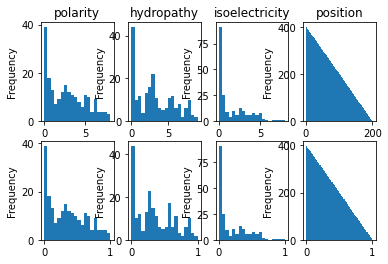

In [62]:
# Normalize pair diff to 0-1
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

def normalize_dict(dic, t_min, t_max):
    norm_dic = {}
    diff = t_max - t_min
    vals = list(dic.values())
    diff_arr = max(vals) - min(vals)
    for k in dic:
        temp = (((dic[k] - min(vals))*diff)/diff_arr) + t_min
        norm_dic[k] = {'val': round(dic[k],6), 'norm': round(temp,6)}
    return norm_dic

pos_norm = normalize(pos_dist, 0, 1)

pol_norm = normalize_dict(pol_dist, 0, 1)
pol_val = [ pol_norm[x]['val'] for x in pol_norm ]
pol_nor = [ pol_norm[x]['norm'] for x in pol_norm ]

hyd_norm = normalize_dict(hydro_dist, 0, 1)
hyd_val = [ hyd_norm[x]['val'] for x in hyd_norm ]
hyd_nor = [ hyd_norm[x]['norm'] for x in hyd_norm ]

iso_norm = normalize_dict(iso_dist, 0, 1)
iso_val = [ iso_norm[x]['val'] for x in iso_norm ]
iso_nor = [ iso_norm[x]['norm'] for x in iso_norm ]

fig, axs = plt.subplots(nrows=2, ncols=4)
pd.Series(pol_val).plot.hist(bins=20, ax=axs[0,0]); axs[0,0].set_title("polarity")
pd.Series(pol_nor).plot.hist(bins=20, ax=axs[1,0])
pd.Series(hyd_val).plot.hist(bins=20, ax=axs[0,1]); axs[0,1].set_title("hydropathy")
pd.Series(hyd_nor).plot.hist(bins=20, ax=axs[1,1])
pd.Series(iso_val).plot.hist(bins=20, ax=axs[0,2]); axs[0,2].set_title("isoelectricity")
pd.Series(iso_nor).plot.hist(bins=20, ax=axs[1,2])
pd.Series(pos_dist).plot.hist(bins=100, ax=axs[0,3]); axs[0,3].set_title("position")
pd.Series(pos_norm).plot.hist(bins=100, ax=axs[1,3])
    

In [66]:
a = np.empty([0,10], dtype = str)
print(a)

[]
